In [ ]:
import torch 
import torch.nn as nn
#importing required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
#number of samples to generate
n = 200

#input and output dimensions
in_dims = 3

out_dims = 2

#generating uniform random data using pytorch
x = torch.rand(n, in_dims).uniform_(-1, 1)

weights_true = np.array([[5, -1, -2], [-1,-1,3],]).T
bias_true = np.array([[1, 1]])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = (5 * x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

torch.Size([200, 3]) (3, 2) (1, 2)
x: torch.Size([200, 3]), weights: (3, 2), bias: (1, 2), y: torch.Size([200, 2])


In [ ]:
def plot_3d(x, y, y_pred=None):
  X_reduced = TSNE(n_components=2).fit_transform(x)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y, label='True')
  if y_pred is not None:
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y_pred, marker='v', label='Predicted')
  plt.legend()
  plt.show()

# Using Torch Linear Module

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, in_dims, hidden_layers):
    super().__init__()
    self.linear1 = nn.Linear(in_dims, hidden_layers)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_layers, 10)
    self.relu = nn.ReLU()
    self.linear3 = nn.Linear(10, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

In [ ]:
from typing import Callable

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

# Converting data to PyTorch data structure

In [ ]:
loss = nn.MSELoss()
model = TorchModel(in_dims,10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float() 
y_pred_tensor = model(x_tensor)
loss_value=loss(y_pred_tensor,y_true_tensor)
print(loss_value)

tensor(59.6264, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


# Fitting the model after training

In [ ]:
torch_fit(x_tensor,y_true_tensor,loss=loss,model=model,lr=0.1,num_epochs=100)

tensor(59.6264, grad_fn=<MseLossBackward>)
tensor(55.5082, grad_fn=<MseLossBackward>)
tensor(50.9367, grad_fn=<MseLossBackward>)
tensor(47.7051, grad_fn=<MseLossBackward>)
tensor(47.1667, grad_fn=<MseLossBackward>)
tensor(46.6167, grad_fn=<MseLossBackward>)
tensor(45.8129, grad_fn=<MseLossBackward>)
tensor(44.6713, grad_fn=<MseLossBackward>)
tensor(43.1134, grad_fn=<MseLossBackward>)
tensor(41.3342, grad_fn=<MseLossBackward>)
tensor(39.5088, grad_fn=<MseLossBackward>)
tensor(37.8018, grad_fn=<MseLossBackward>)
tensor(36.0153, grad_fn=<MseLossBackward>)
tensor(34.2850, grad_fn=<MseLossBackward>)
tensor(33.8067, grad_fn=<MseLossBackward>)
tensor(45.7396, grad_fn=<MseLossBackward>)
tensor(50.2501, grad_fn=<MseLossBackward>)
tensor(57.8795, grad_fn=<MseLossBackward>)
tensor(55.8829, grad_fn=<MseLossBackward>)
tensor(54.1722, grad_fn=<MseLossBackward>)
tensor(52.7169, grad_fn=<MseLossBackward>)
tensor(51.4769, grad_fn=<MseLossBackward>)
tensor(50.4024, grad_fn=<MseLossBackward>)
tensor(49.4

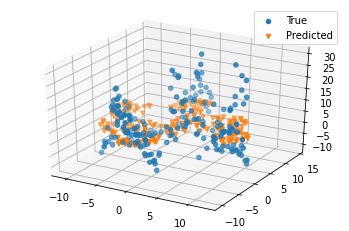

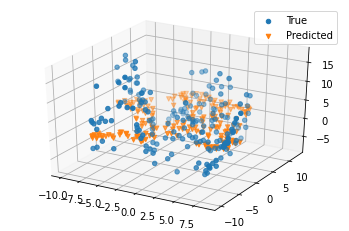

In [ ]:
plot_3d(x_tensor, y_true_tensor[:,0], model(x_tensor).detach()[:,0])
plot_3d(x_tensor, y_true_tensor[:,1], model(x_tensor).detach()[:,1])